<!-- hide this -->

 # <center>[🤜🦈 Введение в `Feature Engineering` ](https://stepik.org/lesson/779914/)</center>

<div class="alert alert-info">

В этом разделе мы разберем примеры подготовки признаков. Основной **фокус сделаем на ручную генерацию признаков** 👐✍️👋🙌🤝. <br>
В зависимости от имеющихся данных, варьируется разнообразие признаков, которые можно извлечь. <br>
Этого видео должно быть достаточно, чтобы придумать серию полезных дополнительных признаков. 

### Оглавление ноутбука
<img src='../images/m2m_tab.JPG' align="right" width="700" height="750" />
<br>

<p><font size="3" face="Arial" font-size="large"><ul type="square">
    
<li><a href="#1">📂 Структура таблицы </a></li>

<li><a href="#g1"> 🛠 Полезные связки:</a>
<ul>
<li><a href="#g1">✍️ groupby() + agg()</a></li>
<li><a href="#g2">🙌 groupby() + transform()</a></li>
<li><a href="#g3">👋 groupby + agg() + самописная функция</a></li>
<li><a href="#g4">👐 pivot_table() + aggfunc()</a></li>
</ul>
</li>
    
    
<li><a href="#look1">👀 Смотрим и генерируем 🔧😵‍</a>
<li><a href="#check1">🤷‍♀️ Проверяте признаки</a>
<li><a href="#6">🧸 Выводы и заключения</a>

</li></ul></font></p>

<!-- <center> <img src='../images/m2m_tab.JPG'> -->

<!-- hide -->

<!-- # hide -->

# Наш случай 👇

<!-- /// -->

<!-- # ddd -->

# <center> <img src = '../images/data_tables_schem.JPG' width = 500> <center> 
    
 
<p id="1"></p>  

# Как придумывать признаки для генерации? 
    
<div class="alert alert-info">
    
- 🏁 Начать с сырых данных. 
    
- 🧩 Брать все, что есть. Покрыть признаками всю имеющуюся информацию в данных
- 🧠 Предполагать, от чего зависит таргет? (время износа от числа поездок) 
- 🤔 Смотреть визуально на классы/ошибки и делать предположения. Какие полезны?
- ⚠️ Совсем много признаков может быть вредно. Потом придется отфильтровывать. 

<!-- hide -->

<!-- hide -->

<!-- hide -->

<!-- hide -->

# <center> Анализируем данные по машинам и таргетам    

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
626,I20900258y,Smart ForTwo,economy,petrol,3.80,2014,61049,2019,28.12,engine_overheat
163,q25090977a,Skoda Rapid,economy,petrol,3.02,2017,130192,2014,47.99,engine_ignition
524,S11905138M,Mercedes-Benz E200,business,petrol,2.64,2015,92250,2016,31.85,engine_fuel


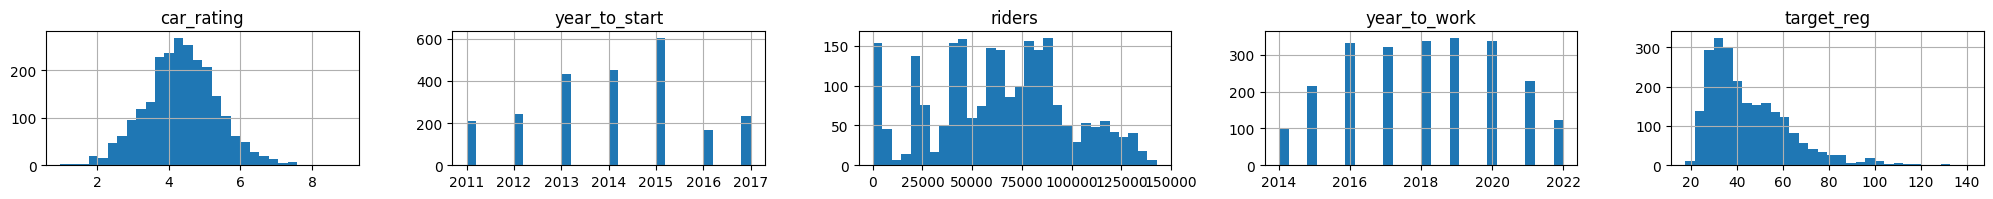

In [26]:
# !pip install numpy pandas seaborn -q
import numpy as np
import pandas as pd

train = pd.read_csv("../data/car_train.csv")
print(train.shape)
train.hist(figsize=(25, 4), layout=(2, 5), bins=30)
train.sample(3)

<div class="alert alert-info">

* `car_id` - идентификатор машины
* `model` / `car_type` / `fuel_type` - марка, класс и тип топлива машины
* `car_rating` / `riders` - общий рейтинг  и общее число поездок к концу 2021-го кода.
* `year_to_start` / `year_to_work` - года выпуска машины и начала работы в автопарке 
* `target_reg` - количество дней до поломки.
* `target_class` - класс поломки (всего 9 видов)

# <center> Информация про поездки

(739500, 14)


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
699545,G41442087L,x-2014093y,p1L,2020-02-04,2.09,24,212,36,70.828592,0,507.728335,0,2.889705,0.001
524461,u19529036K,k88534152q,Q1h,2020-01-14,6.31,21,245,42,76.264270,1,933.391339,0,-4.357720,22.217
14823,J24166270p,A99628604w,P1A,2020-01-18,5.11,14,164,49,69.000000,1,25.086375,0,-1.970335,-33.048


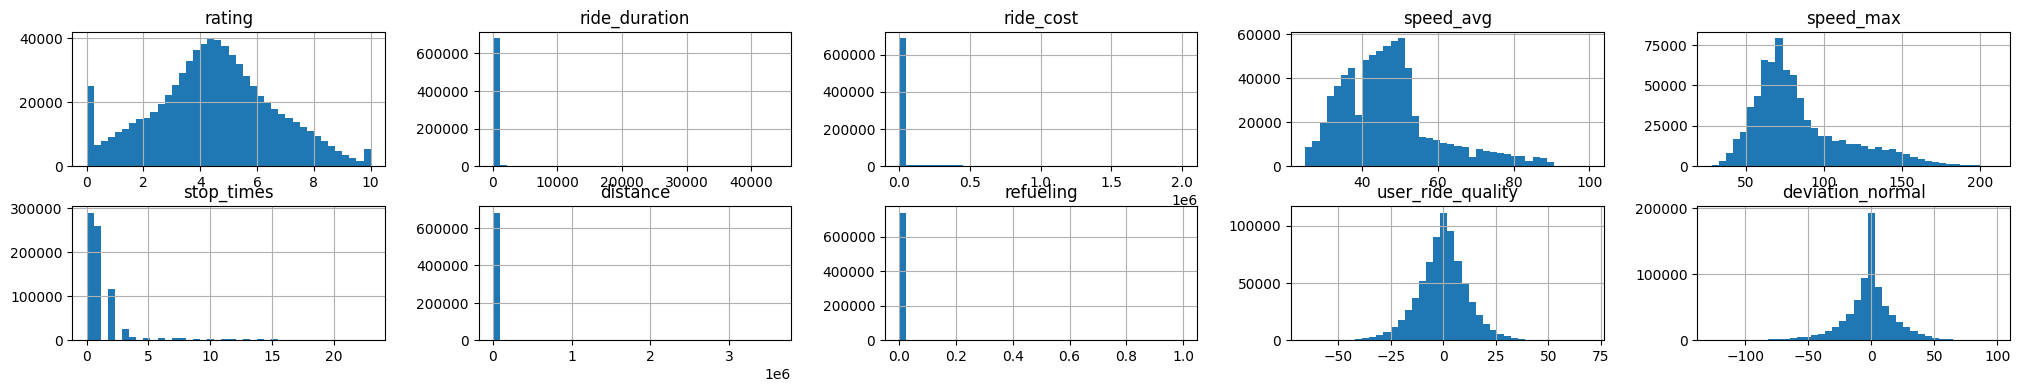

In [25]:
rides_info = pd.read_csv("../data/rides_info.csv")
print(rides_info.shape)
rides_info.hist(figsize=(25, 4), layout=(2, 5), bins=40)
rides_info.sample(3)

<div class="alert alert-info">

* `user_id` / `car_id` / `ride_id` - идентификаторы водителя, машины, поездки соответственно
* `ride_date` / `rating` - дата поездки и рейтинг, поставленный водителем 
* `ride_duration` / `distance` / `ride_cost` -  длительность (время),  пройденное расстояние, стоимость поездки 
* `speed_avg` / `speed_max` - средняя и максимальная скорости поездки соответственно
* `stop_times` / `refueling` - количество остановок (паузы) и флаг - была ли дозаправка.
* `user_ride_quality` - оценка манеры вождения в машины водителя, определенная скоринговой ML системой сервиса.
* `deviation_normal` - общий показатель датчиков о состоянии машины, относительно эталонных показателей (нормы).

# <center> Данные про ремонт машин (fix_info)

(146000, 6)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
122988,P91939666m,RY,2020-3-18 11:29,repair,5.9,18
33915,K-1866847F,LK,2021-12-7 22:27,reparking,1.0,26
100575,e-1713473l,GY,2019-6-19 22:56,repair,6.1,25


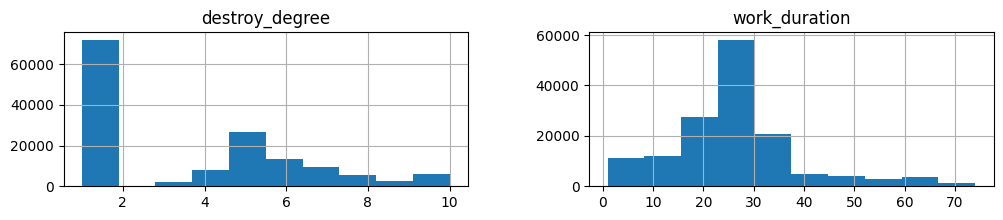

In [31]:
fix_info = pd.read_csv("../data/fix_info.csv").sort_values('worker_id')
print(fix_info.shape)
fix_info.hist(figsize=(12, 2))
fix_info.sample(3)

* `worker_id` / `car_id` - идентификатор работника и машины соответственно 
* `work_type` / `work_duration` - тип и длительность (в часах) проводимой работы
* `destroy_degree` - степень износа/поврежденности машины в случае поломки
* `fix_date` - время начала ремонта (время снятия машины с линии)

<!-- hide -->

<!-- hide -->

<!-- hide -->

<!-- hide -->

# <center>🛠 Связка: `groupby()` + `agg()`
 
<p id="g1"></p>    

   
<img src='../images/fe_groupby.JPG'>

<!-- # hide this -->

<!-- # hide -->

<div class="alert alert-info">

**[`df.aggregate()` == `df.agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)** - Агрегирует с помощью одной или нескольких указанных операций/функций по заданной оси. 

__способ #1__ (не лучший)

In [29]:
fix_info.groupby("car_id", as_index=False).aggregate({
        "worker_id": ["count"],
        "work_duration": ["max", "mean"],
    }
).head(3)

car_id worker_id work_duration           
                  count           max       mean
0  A-1049127W        35            56  27.485714
1  A-1079539w        34            64  27.382353
2  A-1162143G        34            69  27.823529

<!-- # hide -->

__способ #2__ (красивый)

In [5]:
fix_info.groupby("car_id", as_index=False).agg(
    worker_id_count=("worker_id", "count"),
    work_duration_max=("work_duration", "max"),
    work_duration_mean=("work_duration", "mean"),
).head(3)

,car_id,worker_id_count,work_duration_max,work_duration_mean
0,A-1049127W,35,56,27.485714
1,A-1079539w,34,64,27.382353
2,A-1162143G,34,69,27.823529


# <!-- hide -->

<!-- # hide  -->

<!-- # hide -->

# <center> 🛠  Связка: `groupby()` + `transform()` сохраняет исходный размер
    
<p id="g2"></p>   

<div class="alert alert-info">
    
**[`df.transform()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)** - Вызывает функцию для самостоятельного создания `DataFrame` с той же формой оси, как у исходной таблицы.

<!-- # hide -->

__способ #1__ (хороший)

In [35]:
# Среднее время выполнения работы мастером

print(fix_info.shape)

fix_info["worker_speed"] = fix_info.groupby("worker_id")["work_duration"].transform("mean")

print(fix_info.shape)

fix_info.head(3)

(146000, 7)
(146000, 7)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed
38176,m-8902512v,AB,2019-2-16 19:28,repair,5.0,59,26.219917
25968,h-5894617f,AB,2020-8-13 18:19,reparking,1.0,30,26.219917
17050,m-8965256V,AB,2020-5-1 10:20,repair,5.0,33,26.219917


__способ #2__ (плохой)

In [7]:
tmp = fix_info.groupby("worker_id", as_index=False).agg(
    work_duration_mean=("work_duration", "mean")
)

fix_info.merge(tmp, on="worker_id", how="left").head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,work_duration_mean
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49,25.413386,25.413386
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48,26.824627,26.824627
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27,25.714286,25.714286


In [42]:
fix_info["worker_experience"] = fix_info.groupby("worker_id")["car_id"].transform(
    "count"
)
fix_info.head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
38176,m-8902512v,AB,2019-2-16 19:28,repair,5.0,59,26.219917,241
25968,h-5894617f,AB,2020-8-13 18:19,reparking,1.0,30,26.219917,241
17050,m-8965256V,AB,2020-5-1 10:20,repair,5.0,33,26.219917,241


<!-- hide -->

 <!-- hide -->

 <!-- hide -->

<p id="g3"></p>   

# <center> 🛠  Связка `groupby` + `agg()` + ваша выдуманная функция

    
<div class="alert alert-info">
Пример генерации признаков из информации про ремонт

In [43]:
fix_info.head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
38176,m-8902512v,AB,2019-2-16 19:28,repair,5.0,59,26.219917,241
25968,h-5894617f,AB,2020-8-13 18:19,reparking,1.0,30,26.219917,241
17050,m-8965256V,AB,2020-5-1 10:20,repair,5.0,33,26.219917,241


In [44]:
# число уникальных значений
f_nuniq = lambda x: x.nunique()

# число значений, которые больше чем n
more_than_n_func = lambda x, n=8: sum(x > n)

# 30% перцентиль / квантиль уровня 0.3
def quant_func(x):
    return x.quantile(0.3)

In [45]:
# Функции поиска первой и второй моды для категориальных значений
first_mode = lambda x: x.value_counts().index[0]
second_mode = lambda x: x.value_counts().index[1]

In [46]:
fix_info_gr = fix_info.groupby("car_id", as_index=False).agg(
    
    # Все встроенные статистики
    worker_count=("worker_id", "count"),
    work_duration_mean=("work_duration", "mean"),
    work_duration_max=("work_duration", "max"),
    destroy_degree_std=("destroy_degree", "std"),
    destroy_degree_sum=("destroy_degree", "sum"),
    
    # Самописные функции для категорий
    work_type_nuniq=("work_type", f_nuniq),
    work_type_mode=("work_type", first_mode),
    work_type_second_mode=("work_type", second_mode),
    
    # Самописные функции для численных
    destroy_degree_crit_q=("destroy_degree", more_than_n_func),
    worker_quant_exp=("worker_experience", quant_func),
)

fix_info_gr.sample(3)

,car_id,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_mode,work_type_second_mode,destroy_degree_crit_q,worker_quant_exp
3842,v-1736895l,35,25.028571,71,1.963426,104.0,3,reparking,repair,0,250.8
2174,a96529450S,34,26.176471,73,2.976587,134.6,4,repair,reparking,2,259.0
3784,u12808660Q,34,26.264706,67,2.985819,125.6,4,repair,reparking,3,262.9


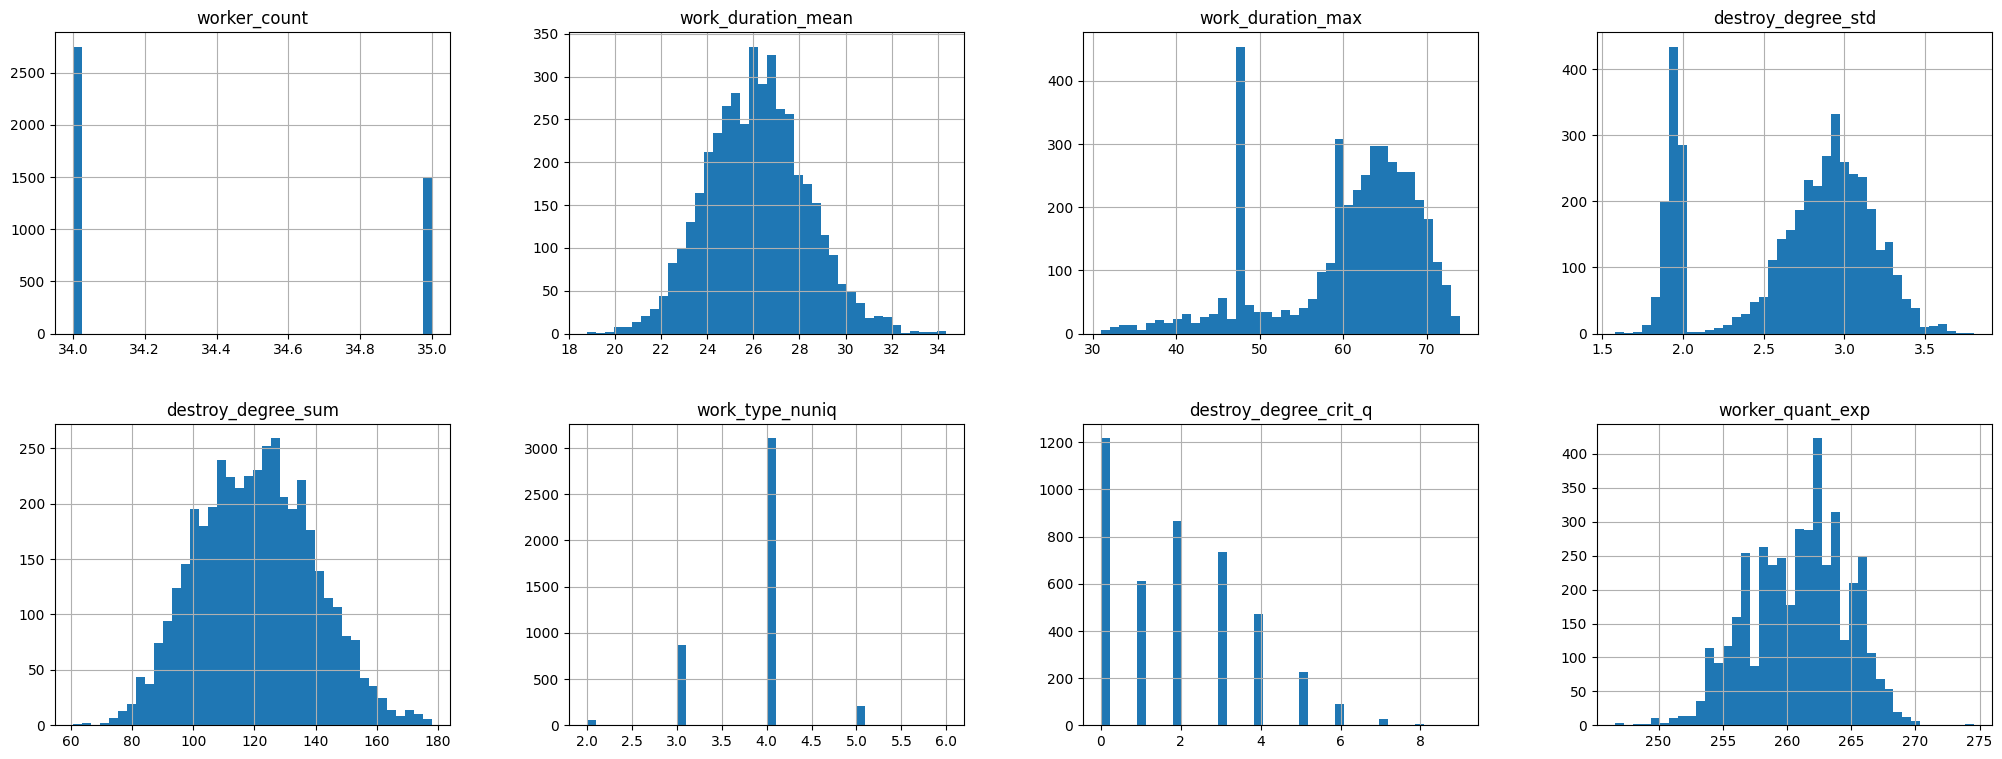

In [47]:
fix_info_gr.hist(figsize=(25, 9), layout=(2, 4), bins=40);

# <center> ⚠️ Проверяйте признаки! ⚠️

<div class="alert alert-info">
    
При генерации фичей легко может пойти что-то не так. <br>
Вы задумывали одно, а получили на деле совсем иное. 
    
* `df.feature.hist()` - вывести гистограмму 
* `df.feature.value_counts()` - вывести численное распределение
    
<p id="check1"></p>   

,car_id,good_feature,gold_feature,killer_feature,bad_feature
247,C29045893T,25.142857,46,2.715616,0
2354,d-1302572o,23.882353,61,1.894254,0
294,D-8569809Z,25.117647,58,2.676412,0


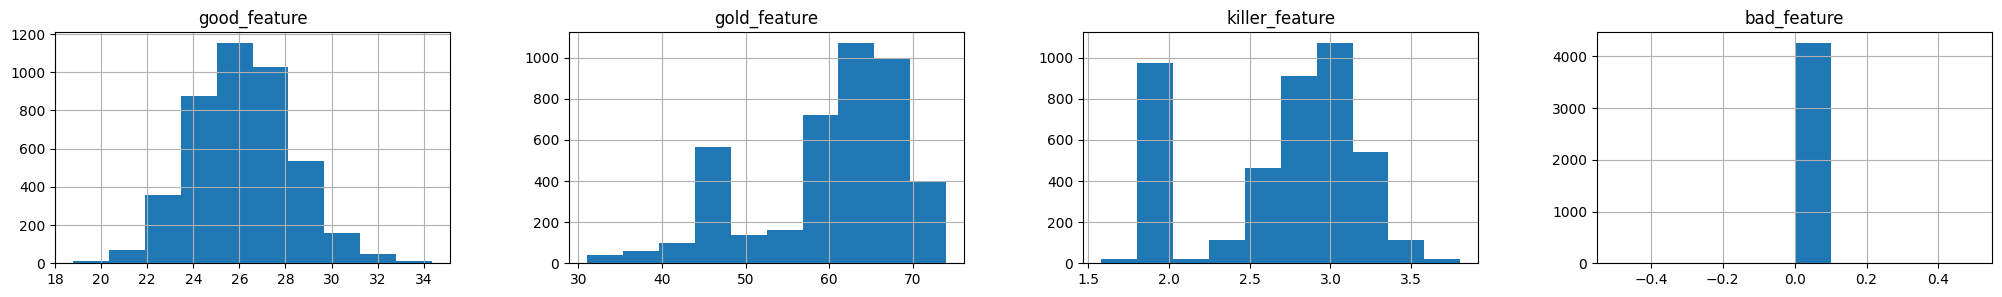

In [48]:
bad_func = lambda x: sum(x <= -100)

tmp = fix_info.groupby("car_id", as_index=False).agg(

    # Все встроенные статистики
    good_feature =("work_duration", "mean"),
    gold_feature =("work_duration", "max"),
    killer_feature =("destroy_degree", "std"),

    # Самописные функции для категорий
    bad_feature =("destroy_degree", bad_func),
)

tmp.hist(figsize=(25, 3), layout=(1, 4))
tmp.sample(3)



<!-- hide  -->

<!-- hide -->

# <center> Генерация признаков 👉 Визуальный анализ признаков 👉 Генерация признаков

In [15]:
# Добавим к исходной таблице новые признаки
tmp = train.merge(fix_info_gr, on="car_id", how="left")
tmp.head(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_mode,work_type_second_mode,destroy_degree_crit_q,worker_quant_exp
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,35,26.657143,56,2.732847,106.7,4,reparking,repair,2,271.8
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,35,24.942857,48,2.707233,102.1,5,reparking,repair,1,264.6
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,35,26.142857,59,2.978077,130.9,5,repair,reparking,2,265.0


1

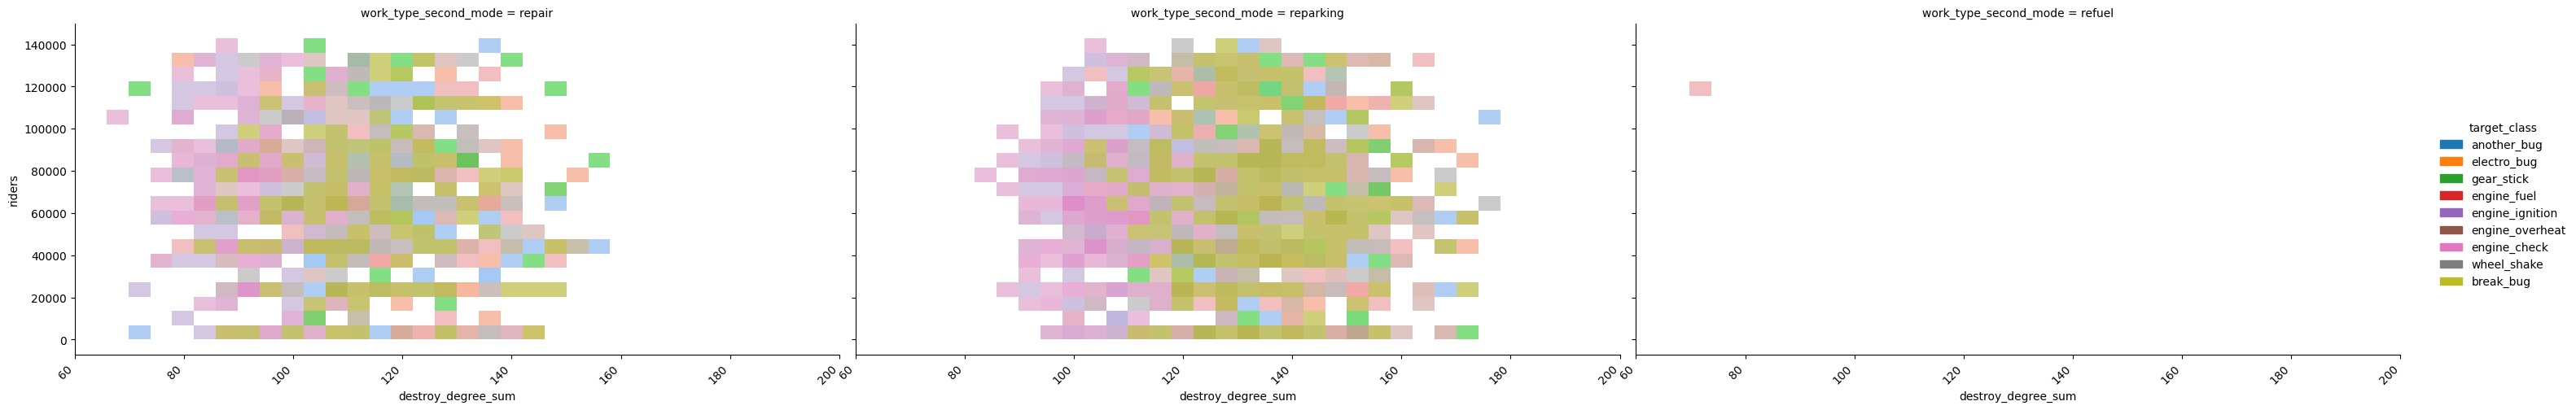

In [16]:
import seaborn as sns

g = sns.displot(
    data=tmp,
    x="destroy_degree_sum",
    y="riders",
    aspect=2,
    kind="hist",
    alpha=0.8,
    hue="target_class",
    col="work_type_second_mode",
).set_xticklabels(rotation=45, horizontalalignment="right")
1

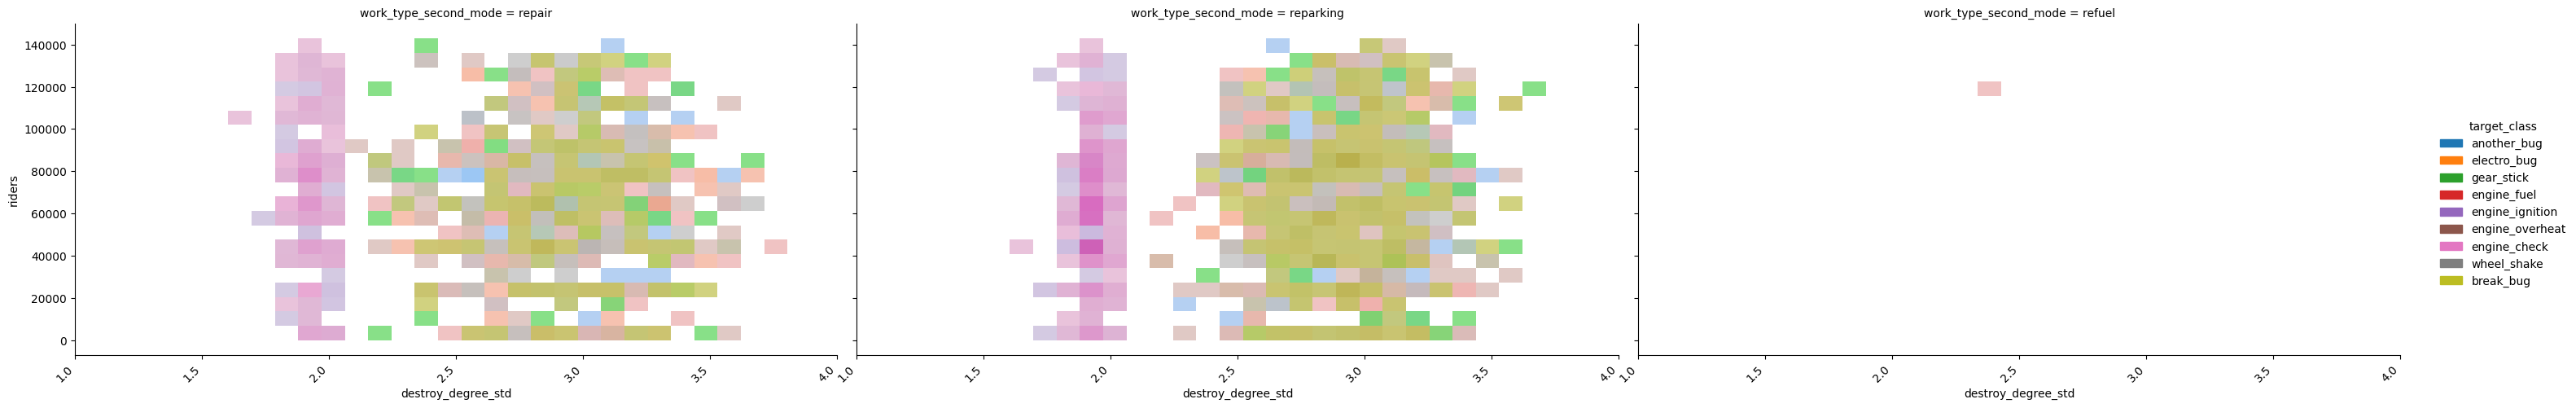

In [17]:
g = sns.displot(
    data=tmp,
    x="destroy_degree_std",
    y="riders",
    aspect=2,
    kind="hist",
    alpha=0.8,
    hue="target_class",
    col="work_type_second_mode",
).set_xticklabels(rotation=45, horizontalalignment="right");

<div class="alert alert-info">
    
Визуально видно, что `destroy_degree_std` полезнее для классификации, чем признак `destroy_degree_sum`

<!-- hide -->

<!-- hide -->

<!-- hide -->

# <center>🛠 Связка: `pivot()`/`pivot_table()` + `aggfunc()`
    
<p id="g4"></p>   

<center><img src='https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/pic/pivot_table_pandas.png' width=700>

In [18]:
fix_info.head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49,25.413386,254
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48,26.824627,268
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27,25.714286,301


In [60]:
fix_info_pivot = fix_info.pivot_table(
    index="car_id",  # Строка, для которой хотим сгенерировать признаки
    columns=["work_type"],  # колонка, которую вытяним в столбец
    values=["destroy_degree"],  # столбец, по которой будем считать статистики
    aggfunc=["mean", 'count'],  # признаки для генерации (mean/count/sum)
).fillna(0)

fix_info_pivot.columns = [f"{i[2]}_{i[0]}" for i in fix_info_pivot.columns]
fix_info_pivot.reset_index(inplace=True)

fix_info_pivot.sample(3)

,car_id,oil_change_mean,refuel_mean,refuel_check_mean,refuel_reparking_mean,repair_mean,reparking_mean,oil_change_count,refuel_count,refuel_check_count,refuel_reparking_count,repair_count,reparking_count
1250,P-8016178d,0.0,1.0,1.0,0.0,5.457143,1.411765,0.0,1.0,3.0,0.0,14.0,17.0
250,C50021983M,0.0,1.0,1.0,1.0,5.578571,1.000000,0.0,1.0,3.0,1.0,14.0,15.0
655,I-1834975z,0.0,1.0,1.0,0.0,6.182353,1.000000,0.0,3.0,2.0,0.0,17.0,13.0


<!-- hide -->

<!-- hide -->

<!-- hide -->

# <center> Генерируем фичи по водителям </center>

In [20]:
import pandas as pd

train = pd.read_csv("../data/car_train.csv")
rides = pd.read_csv("../data/rides_info.csv")

rides = train.merge(rides, on="car_id", how="left")
rides.head(4)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,...,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,...,5.72,220,3514,42,NaN,6,1.682556e+03,0,0.524750,0.0
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,...,2.52,37392,523483,45,53.0,2,1.711379e+06,0,1.723151,0.0
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,...,7.17,45,444,54,82.0,0,9.523155e+02,0,0.876440,-0.0
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,...,6.19,10,105,35,40.0,0,2.372539e+02,0,1.274242,-0.0


<!-- hide -->

# <center> 👀 Смотрим и генерируем 🔧😵‍

    
<div class="alert alert-info">
    
<p id="look1"></p>       

__Цель__: придумай признаки и раздели классы

In [54]:
# Как ведет себя deviation_normal в времени для 10 автомобилей
tmp = rides
cols2select = [ "deviation_normal", "ride_date", "target_class", "car_id", "user_ride_quality", ]
ids2select = ["f-4873956c", "p-7109749V", "p-3304414p", "f-1300760u", "L-4452446Z"]
tmp = tmp[tmp["car_id"].isin(tmp.car_id.sample(1000, random_state=8).unique()[:15])]
tmp = tmp[tmp["car_id"].isin(ids2select)][cols2select]

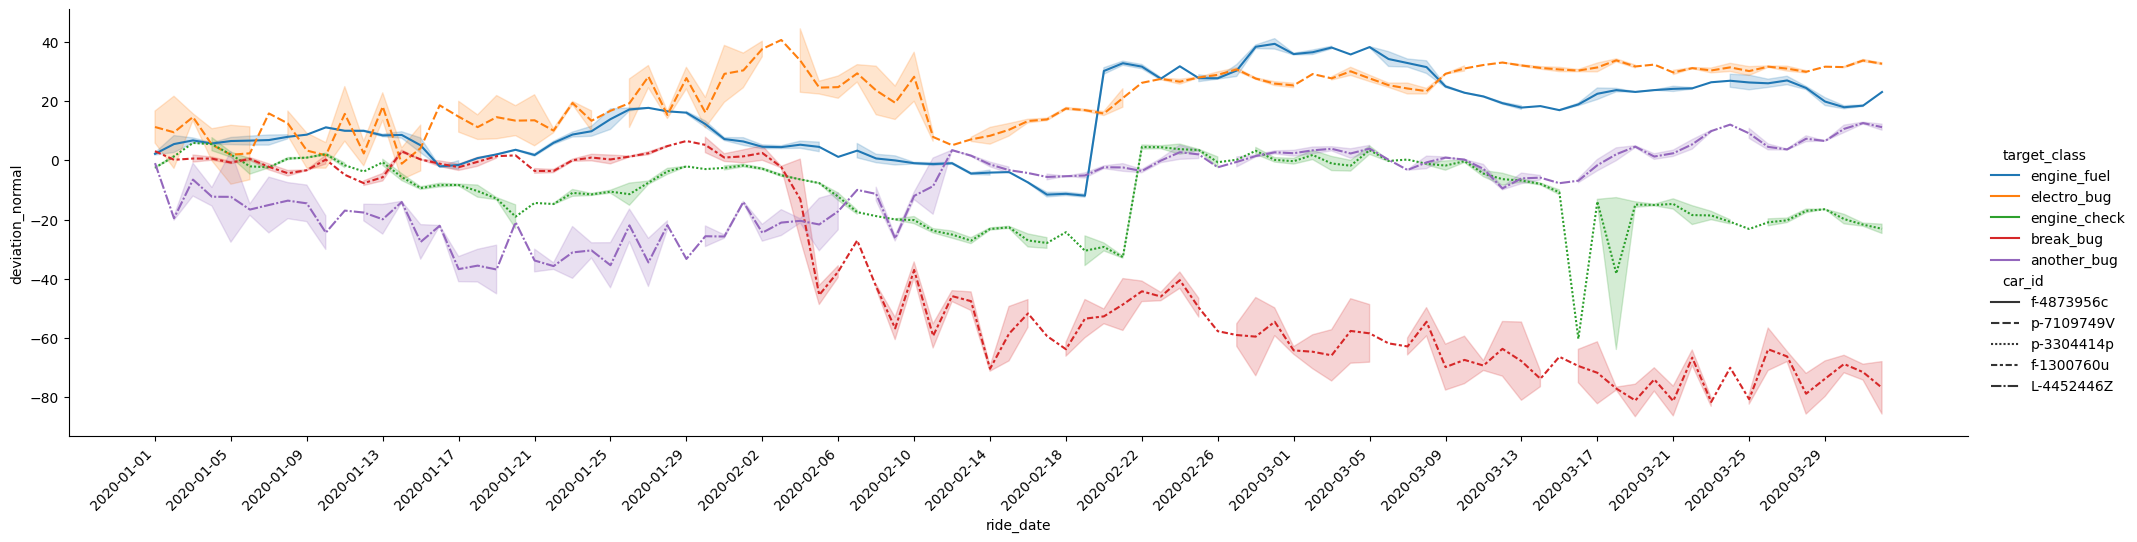

In [22]:
import seaborn as sns

g = sns.relplot(
    data=tmp,
    kind="line",
    x="ride_date",
    y="deviation_normal",  # user_ride_quality
    hue="target_class",
    aspect=4,
    style="car_id",
    legend=True,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=4);

# <center> 🤔 Что вообще можно сгенерировать через `groupby`? 🧠
  
    
    
<div class="alert alert-info">    
    
Для каждой машины есть своя история поездок, у которой, в зависимости от будущей поломки есть свои паттерны    
    
- Статистики (среднее/дисперсия/максимум/количество)
- Сложные признаки с помощью функций

    
<img src='../images/fs_kinds.JPG'>

<!-- hide -->

<!-- hide -->

# <center>  🛒 Покрывайте все имеющиеся признаки! 🛍
В других признаках тоже можно найти интересные паттерны. 

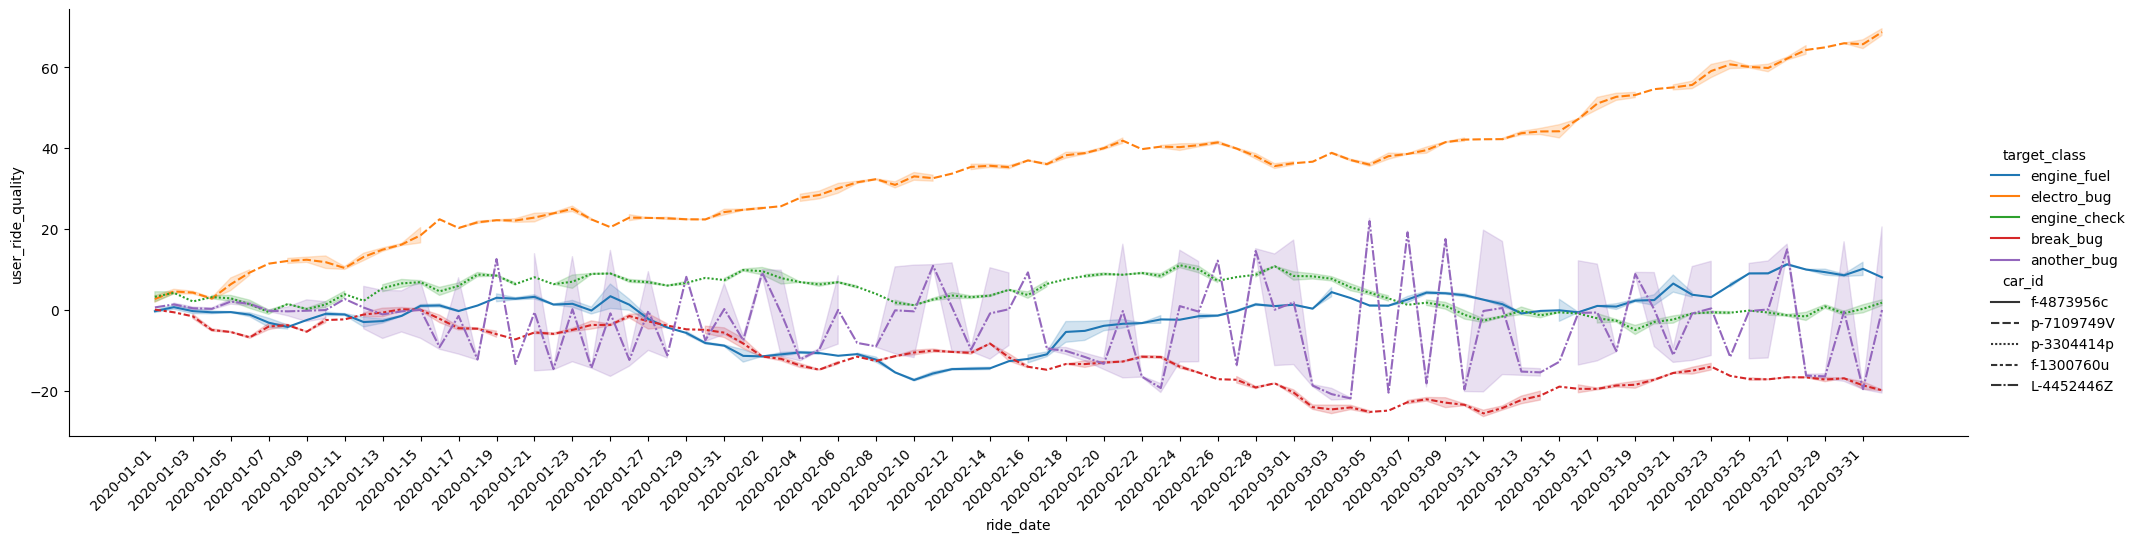

In [23]:
import seaborn as sns

g = sns.relplot(
    data=tmp,
    kind="line",
    x="ride_date",
    y="user_ride_quality",  # user_ride_quality
    hue="target_class",
    aspect=4,
    style="car_id",
    legend=True,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

<div class="alert alert-info">
    
Возможно не все эти признаки понадобятся вам для задачи курса, но это хороший шанс потренироваться. После этих задач вы будете свободнее чувствовать себя в извлечении полезных паттернов из логов и временных рядов.

* `feature_min_max_diff` : разница между максимальным и минимальным значениями `deviation_normal` для каждой машины
* `feature_corner` : угол наклона по признаку `user_ride_quality` для каждой машины
* `feature_mean` : среднее значение `deviation_normal` для каждой машины
* `feature_shift` : точка перегиба/сдвига для `deviation_normal`
* `feature_start` : значение точки старта для `deviation_normal`
* `feature_nans`: сумма пропусков для столбца `...` для каждой машины 
* `feature_quant`: `X %` квантиль для столбца `...` для каждой машины 

<!-- hide this -->

<!-- hide this -->

<!-- hide this -->

<!-- hide this -->

# <center> 🧸 Выводы и заключения 

<p id="h2"></p>   

- 🧩 По возможности стоит покрыть все имеющиеся таблицы
- 🛠 Полезные связки методов для генерации `groupby` + `agg` и `groupby` + `transform`
- 👀 Ищите полезные паттеры глазами
- 🧠 Полезно смотреть на качество признаков. 

    
**В следующих модулях**

- ⚠️ Генерацию фичей можно ускорить. 
- ⚠️ Сгенерированные фичи можно фильтровать.